In [168]:
import uproot
import awkward as ak
import numpy as np

In [76]:
root = uproot.open("DemoNtuple.root")
root

<ReadOnlyDirectory '/' at 0x7fc99a91d550>

In [77]:
##In command line to open root file with up root
with uproot.open("DemoNtuple.root"):
    ...

In [82]:
# list keys
root.keys()

['demo;1', 'demo/fTree;1']

In [83]:
root1=root['demo/fTree']

In [84]:
root1.keys()

['Event', 'genPhoton1', 'genPhoton2']

In [85]:
root1["Event"].array()

<Array [{run: 1, LS: 35, ... evnum: 141062}] type='13433 * {"run": int64, "LS": ...'>

In [87]:
#Numpy array dist
eve_numpy = root1.arrays(filter_name="Even*", library="np")
eve_numpy

{'Event': array([(1, 35,  53891), (1, 35,  53895), (1, 35,  53893), ...,
        (1, 89, 141050), (1, 89, 141064), (1, 89, 141062)],
       dtype=[('run', '<i8'), ('LS', '<i8'), ('evnum', '<i8')])}

In [88]:
# Awkward recor array
ak_numpy = root1.arrays(filter_name="Even*", library="ak")
ak_numpy

<Array [{Event: {run: 1, ... evnum: 141062}}] type='13433 * {"Event": {"run": in...'>

In [91]:
# Pandas data frame
pd_numpy = root1.arrays(filter_name="Even*",library="pd")
pd_numpy

Event            
        run  LS   evnum
0         1  35   53891
1         1  35   53895
2         1  35   53893
3         1  35   53904
4         1  35   53901
...     ...  ..     ...
13428     1  89  141061
13429     1  89  141058
13430     1  89  141050
13431     1  89  141064
13432     1  89  141062

[13433 rows x 3 columns]

In [20]:
from collections.abc import Mapping
isinstance(root, Mapping)



True

In [19]:
root.classnames()

{'demo;1': 'TDirectory', 'demo/fTree;1': 'TTree'}

In [23]:
root.keys(filter_classname="TTree")

['demo/fTree;1']

In [123]:
# Reading histogram from root file using uproot
histogram = uproot.open("/Users/bhimbam/Documents/root_exercise/photon1_eff_id_pilup_makeclass_histfile.root")
histogram

<ReadOnlyDirectory '/' at 0x7fc99bd550a0>

In [124]:
histogram.keys()

['photon1_EB_eff_hist;1',
 'photon1_EE_eff_hist;1',
 'photon1_EB_nPV0_15_eff_hist;1',
 'photon1_EB_nPV15_30_eff_hist;1',
 'photon1_EB_nPV30_40_eff_hist;1',
 'photon1_EB_nPV40_50_eff_hist;1',
 'photon1_EB_nPV50_up_eff_hist;1',
 'photon1_EE_nPV0_15_eff_hist;1',
 'photon1_EE_nPV15_30_eff_hist;1',
 'photon1_EE_nPV30_40_eff_hist;1',
 'photon1_EE_nPV40_50_eff_hist;1',
 'photon1_EE_nPV50_up_eff_hist;1']

In [131]:
histogram["photon1_EB_eff_hist"].to_hist()

Hist(Variable([0, 100, 200, 300, 370, 440, 510, 580, 650, 720, 790, 860, 930, 1100, 1300, 1500], name='xaxis', label='xaxis'), storage=Weight()) # Sum: WeightedSum(value=1.53469, variance=0.020926)

In [129]:
histogram["photon1_EB_eff_hist"].to_boost()

AttributeError: 'Histogram' object has no attribute 'plot'

AttributeError: 'AxesSubplot' object has no attribute 'stairs'

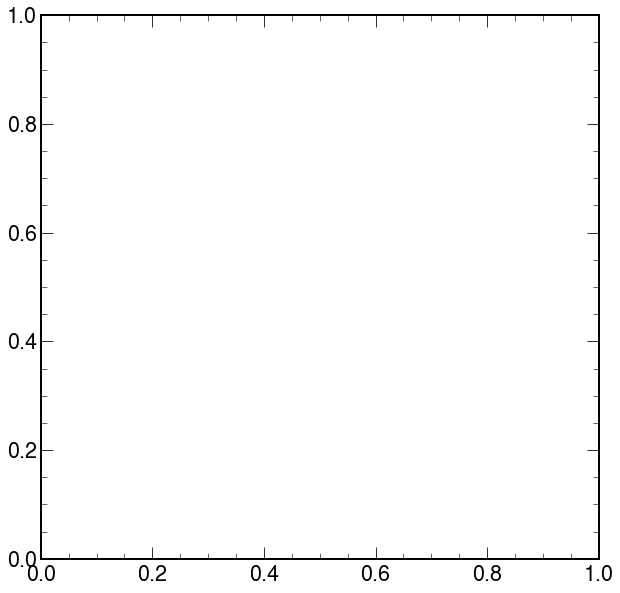

In [61]:
import matplotlib.pyplot as plt
import mplhep

plt.style.use(mplhep.style.CMS)
mplhep.histplot(histogram["photon1_EB_eff_hist"].to_boost())
mplhep.cms.label()

AttributeError: 'AxesSubplot' object has no attribute 'stairs'

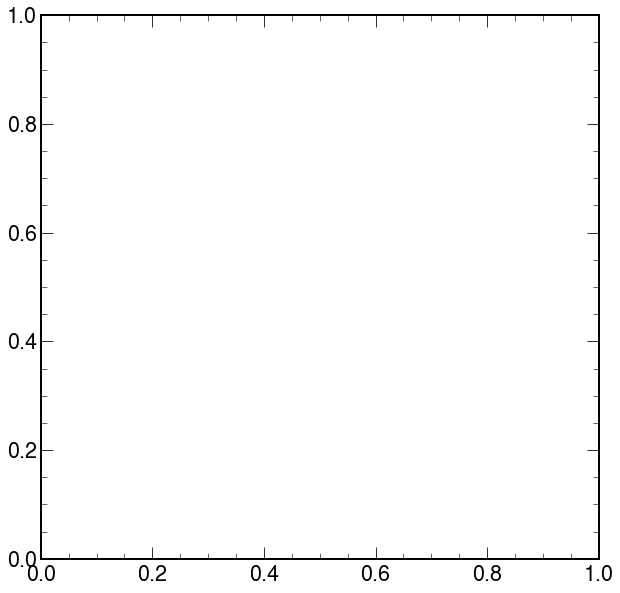

In [59]:
histogram["photon1_EB_eff_hist"].to_hist().plot();

In [69]:
tree1 = uproot.open("/Users/bhimbam/Documents/root_exercise/ExoEfficiency.root")
tree1.keys()

['exoeff;1', 'exoeff/fTree;1']

In [70]:
tree=tree1['exoeff/fTree']
tree.keys()

['Event',
 'GenPhoton1',
 'GenPhoton2',
 'Photon1',
 'Photon2',
 'Vertex0',
 'PrimaryVertex',
 'nPV',
 'BeamSpot']

In [71]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | struct {int64_t run; ... | AsDtype("[('run', '>i8'), (...
GenPhoton1           | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
GenPhoton2           | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Photon1              | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Photon2              | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Vertex0              | struct {double vx; do... | AsDtype("[('vx', '>f8'), ('...
PrimaryVertex        | struct {double vx; do... | AsDtype("[('vx', '>f8'), ('...
nPV                  | int32_t                  | AsDtype('>i4')
BeamSpot             | struct {double x0; do... | AsDtype("[('x0', '>f8'), ('...


In [72]:
tree.items()

[('Event', <TBranch 'Event' at 0x7fc99b024340>),
 ('GenPhoton1', <TBranch 'GenPhoton1' at 0x7fc99b0378e0>),
 ('GenPhoton2', <TBranch 'GenPhoton2' at 0x7fc99b0480d0>),
 ('Photon1', <TBranch 'Photon1' at 0x7fc99b054820>),
 ('Photon2', <TBranch 'Photon2' at 0x7fc99ad11820>),
 ('Vertex0', <TBranch 'Vertex0' at 0x7fc99aaf6a00>),
 ('PrimaryVertex', <TBranch 'PrimaryVertex' at 0x7fc99a97e940>),
 ('nPV', <TBranch 'nPV' at 0x7fc99ab57400>),
 ('BeamSpot', <TBranch 'BeamSpot' at 0x7fc99ab57d90>)]

In [ ]:
tree.typenames()

In [74]:
tree["Event"].array()

<Array [{run: 1, ... ] type='11000 * {"run": int64, "LS": int64, "evnum": int64,...'>

In [121]:
# Pandas data frame
pd_numpy = tree.arrays(filter_name="Photon*", library="pd")
pd_numpy

Photon1                                                     \
               pt       eta       phi     scEta     scPhi        rho   
0      728.036133  0.639504  0.721362  0.686892  0.721540   0.480970   
1      930.206665 -1.103057  2.187802 -1.087982  2.187568   1.368023   
2      804.540894  0.591784 -2.880424  0.597564 -2.880685   1.231019   
3      933.819275  0.008550 -1.105175 -0.011105 -1.104972   9.806479   
4      635.021973 -1.208045 -1.111619 -1.204710 -1.111407  18.395191   
...           ...       ...       ...       ...       ...        ...   
10995  478.902985 -0.697511  0.277372 -0.696439  0.277640  38.365326   
10996  648.309387 -0.955750 -1.163268 -0.924184 -1.163078  10.017972   
10997  366.993988 -1.606254 -0.908207 -1.600248 -0.907960  37.840878   
10998  683.131531 -0.633676  1.069594 -0.631324  1.069671  30.933018   
10999  298.621552 -1.825751  0.583145 -1.818164  0.583412  35.531380   

                                                                         ...  \
      chargedHadIso03 neutralHadIso03 photonIso03 rhoCorChargedHadIso03  ...   
0            0.000000        7.089421    0.000000              -9999.99  ...   
1            0.000000        6.430976    2.644760              -9999.99  ...   
2            2.611803        3.751288    0.000000              -9999.99  ...   
3            0.455077       10.412931    0.714209              -9999.99  ...   
4            0.000000        1.099834    0.429422              -9999.99  ...   
...               ...             ...         ...                   ...  ...   
10995        0.000000        0.907747    4.872346              -9999.99  ...   
10996        0.000000        2.758707    2.177464              -9999.99  ...   
10997        0.000000        2.998587    2.145254              -9999.99  ...   
10998        0.000000        1.335656   22.937115              -9999.99  ...   
10999        0.000000        3.686604    0.000000              -9999.99  ...   

            Photon2                                                           \
      passCorPhoIso passSieie passHighPtID passChIsoDenom passCorPhoIsoDenom   
0              True      True        False           True               True   
1              True      True        False           True               True   
2              True      True        False           True               True   
3              True      True         True           True               True   
4              True      True         True           True               True   
...             ...       ...          ...            ...                ...   
10995          True      True        False           True               True   
10996          True      True        False           True               True   
10997         False     False        False           True              False   
10998          True      True        False           True               True   
10999          True      True        False           True               True   

                                                                                
      isFakeable isNumeratorObjCand isDenominatorObj isSaturated isMCTruthFake  
0          False              False            False       False         False  
1          False              False            False       False         False  
2          False              False            False       False         False  
3          False               True            False       False         False  
4          False               True            False       False         False  
...          ...                ...              ...         ...           ...  
10995      False              False            False       False         False  
10996      False              False            False       False         False  
10997      False              False            False       False         False  
10998      False              False            False       False         False  
10999      False   

In [120]:
# Pandas data frame
pd_numpy = tree.arrays( filter_name ="nP*",library="pd")
pd_numpy

,nPV
0,1
1,2
2,1
3,19
4,21
...,...
10995,64
10996,12
10997,52
10998,48


In [122]:
# Pandas data frame
pd_numpy = tree.arrays(library="pd")
pd_numpy

KeyError: ('nPV', nan)

##### TO split or not to split

In [134]:
event= uproot.open("/Users/bhimbam/Documents/root_exercise/ExoEfficiency.root:exoeff/fTree")

In [135]:
event.arrays(["Event", "GenPhoton1", "GenPhoton2", "Photon1", "Photon2", "Vertex0", "PrimaryVertex", "BeamSpot"], library='pd')

Event                                                              \
    run LS evnum processid bx orbit       ptHat  alphaqcd  alphaqed   
0     1  1    11      5026 -1    -1  131.293686  0.122894  0.007850   
1     1  1    52      5026 -1    -1  452.969330  0.104769  0.007962   
2     1  1   369      5026 -1    -1  321.930969  0.109119  0.007931   
3     1  1   647      5026 -1    -1  313.782959  0.109460  0.007929   
4     1  1   718      5026 -1    -1   73.758049  0.134527  0.007799   
5     1  1   812      5026 -1    -1  361.116364  0.107616  0.007941   
6     1  1   830      5026 -1    -1   82.234489  0.132167  0.007808   
7     1  2  1325      5026 -1    -1  134.152435  0.122498  0.007852   
8     1  2  1710      5026 -1    -1  423.391663  0.105602  0.007956   
9     1  2  1994      5026 -1    -1  135.684769  0.122291  0.007853   

               ... PrimaryVertex        BeamSpot                               \
       qscale  ...       nTracks isFake       x0        y0        z0   sigmaZ   
0  131.293686  ...             0  False  0.01078  0.041893  0.024875  3.49885   
1  452.969330  ...             0  False  0.01078  0.041893  0.024875  3.49885   
2  321.930969  ...             0  False  0.01078  0.041893  0.024875  3.49885   
3  313.782959  ...             0  False  0.01078  0.041893  0.024875  3.49885   
4   73.758049  ...             0  False  0.01078  0.041893  0.024875  3.49885   
5  361.116364  ...             0  False  0.01078  0.041893  0.024875  3.49885   
6   82.234489  ...             0  False  0.01078  0.041893  0.024875  3.49885   
7  134.152435  ...             0  False  0.01078  0.041893  0.024875  3.49885   
8  423.391663  ...             0  False  0.01078  0.041893  0.024875  3.49885   
9  135.684769  ...             0  False  0.01078  0.041893  0.024875  3.49885   

                                              
    x0error   y0error   z0error sigmaZ0error  
0  0.000012  0.000012  0.013973      0.00988  
1  0.000012  0.000012  0.013973      0.00988  
2  0.000012  0.000012  0.013973      0.00988  
3  0.000012  0.000012  0.013973      0.00988  
4  0.000012  0.000012  0.013973      0.00988  
5  0.000012  0.000012  0.013973      0.00988  
6  0.000012  0.000012  0.013973      0.00988  
7  0.000012  0.000012  0.013973      0.00988  
8  0.000012  0.000012  0.013973      0.00988  
9  0.000012  0.000012  0.013973      0.00988  

[10 rows x 247 columns]

In [136]:
event.arrays(filter_name='nPV', cut="nPV>55",library='pd')

,nPV
3,66
7,57


In [155]:
event.arrays(filter_name="/(GenPhoton|Photon)[12]/",library='pd')

GenPhoton1                                                                \
           pt       eta       phi deltaR_match deltaR_matchDau ptDiff_match   
0  126.052437  1.025837 -2.175930   -999999.99      -999999.99   -999999.99   
1  452.557190  1.315035  1.105513   -999999.99      -999999.99   -999999.99   
2  339.877411 -0.474076 -2.821441   -999999.99      -999999.99   -999999.99   
3  319.082764  1.279768  0.966729   -999999.99      -999999.99   -999999.99   
4   95.664673 -0.026893  1.809065   -999999.99      -999999.99   -999999.99   
5  360.595795 -0.816622 -2.400841   -999999.99      -999999.99   -999999.99   
6   86.982834  0.029984 -2.459908   -999999.99      -999999.99   -999999.99   
7  106.067673 -1.070827 -1.831188   -999999.99      -999999.99   -999999.99   
8  419.757172 -0.520929 -2.773702   -999999.99      -999999.99   -999999.99   
9  142.526337  1.278564  1.350725   -999999.99      -999999.99   -999999.99   

                                                         ...   GenPhoton2  \
  matchCategory matchType nPhotonMotherDaughters status  ... ptDiff_match   
0       -999999   -999999                -999999      1  ...   -999999.99   
1       -999999   -999999                -999999      1  ...   -999999.99   
2       -999999   -999999                -999999      1  ...   -999999.99   
3       -999999   -999999                -999999      1  ...   -999999.99   
4       -999999   -999999                -999999      1  ...   -999999.99   
5       -999999   -999999                -999999      1  ...   -999999.99   
6       -999999   -999999                -999999      1  ...   -999999.99   
7       -999999   -999999                -999999      1  ...   -999999.99   
8       -999999   -999999                -999999      1  ...   -999999.99   
9       -999999   -999999                -999999      1  ...   -999999.99   

                                                                      \
  matchCategory matchType nPhotonMotherDaughters status motherStatus   
0       -999999   -999999                -999999      1           23   
1       -999999   -999999                -999999      1           23   
2       -999999   -999999                -999999      1           23   
3       -999999   -999999                -999999      1           23   
4       -999999   -999999                -999999      1           23   
5       -999999   -999999                -999999      1           23   
6       -999999   -999999                -999999      1           23   
7       -999999   -999999                -999999      1           23   
8       -999999   -999999                -999999      1           23   
9       -999999   -999999                -999999      1           23   

                                                        
  grandmotherStatus pdgId motherPdgId grandmotherPdgId  
0                21    22          22               -2  
1                21    22          22               -2  
2                21    22          22               -2  
3                21    22          22               -2  
4                21    22          22               -2  
5                21    22          22               -2  
6                21    22          22               -2  
7                21    22          22                2  
8                21    22          22               -2  
9                21    22          22                2  

[10 rows x 30 columns]

In [137]:
event.arrays(["A","B"], aliases={"A":"nPV*nPV","B":"nPV"}, library='pd')

,A,B
0,1296,36
1,3025,55
2,2704,52
3,4356,66
4,2704,52
5,2916,54
6,3025,55
7,3249,57
8,2809,53
9,2809,53


In [138]:
event.arrays(["A","B"], aliases={"A":"Photon1","B":"Photon2"}, library='pd')

A                                                     \
           pt       eta       phi     scEta     scPhi        rho   
0  125.490379  1.029156 -2.175756  1.026527 -2.175865  15.745706   
1  461.181000  1.294560  1.106017  1.293692  1.106085  46.124050   
2  338.327087 -0.473823 -2.820184 -0.480533 -2.820440  34.669067   
3  313.911682  1.281855  0.966435  1.270770  0.966546  45.016102   
4   97.729622 -0.027648  1.809882  0.002676  1.809738  32.293472   
5  370.828278 -0.783220 -2.399389 -0.806746 -2.399557  36.897232   
6   87.298897  0.029767 -2.459968  0.042845 -2.460154  34.116501   
7  105.914192 -1.072385 -1.829374 -1.079390 -1.829376  44.280678   
8  417.435150 -0.534054 -2.775139 -0.505358 -2.775390  41.022594   
9  141.319321  1.276435  1.351308  1.271205  1.351299  36.231747   

                                                                     ...  \
  chargedHadIso03 neutralHadIso03 photonIso03 rhoCorChargedHadIso03  ...   
0        0.997579        1.487268    1.749827              -9999.99  ...   
1        0.000000        0.000000    2.697082              -9999.99  ...   
2        1.130038        0.000000    3.434371              -9999.99  ...   
3        0.000000        0.911006    4.035452              -9999.99  ...   
4        0.354917        1.875271    3.032410              -9999.99  ...   
5        1.858191        1.863300    2.740664              -9999.99  ...   
6        0.000000        3.577275    1.094572              -9999.99  ...   
7        0.283819        0.000000    3.822777              -9999.99  ...   
8        0.000000        0.977846    1.282100              -9999.99  ...   
9        0.000000        1.247128    2.820728              -9999.99  ...   

              B                                                           \
  passCorPhoIso passSieie passHighPtID passChIsoDenom passCorPhoIsoDenom   
0         False     False        False          False              False   
1          True      True         True           True               True   
2          True      True         True           True               True   
3          True      True        False           True               True   
4         False     False        False          False              False   
5          True      True         True           True               True   
6         False     False        False          False              False   
7          True      True         True           True               True   
8          True      True         True           True               True   
9          True      True         True           True               True   

                                                                            
  isFakeable isNumeratorObjCand isDenominatorObj isSaturated isMCTruthFake  
0      False              False            False       False         False  
1      False               True            False       False         False  
2      False               True            False       False         False  
3      False              False            False       False         False  
4      False              False            False       False         False  
5      False               True            False       False         False  
6      False              False            False       False         False  
7      False               True            False       False         False  
8      False               True            False       False         False  
9      False               True            False       False         False  

[10 rows x 160 columns]

In [148]:
tree= uproot.open("/Users/bhimbam/Documents/root_exercise/ExoEfficiency.root:exoeff/fTree")
tree.keys()

['Event',
 'GenPhoton1',
 'GenPhoton2',
 'Photon1',
 'Photon2',
 'Vertex0',
 'PrimaryVertex',
 'nPV',
 'BeamSpot']

In [149]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | struct {int64_t run; ... | AsDtype("[('run', '>i8'), (...
GenPhoton1           | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
GenPhoton2           | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Photon1              | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Photon2              | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Vertex0              | struct {double vx; do... | AsDtype("[('vx', '>f8'), ('...
PrimaryVertex        | struct {double vx; do... | AsDtype("[('vx', '>f8'), ('...
nPV                  | int32_t                  | AsDtype('>i4')
BeamSpot             | struct {double x0; do... | AsDtype("[('x0', '>f8'), ('...


In [162]:
A=tree.arrays(filter_name="Bea*",library='np')

In [171]:
A


{'BeamSpot': array([(0.0107796, 0.041893, 0.0248755, 3.49885011, 1.190945e-05, 1.17051698e-05, 0.01397297, 0.0098804),
        (0.0107796, 0.041893, 0.0248755, 3.49885011, 1.190945e-05, 1.17051698e-05, 0.01397297, 0.0098804),
        (0.0107796, 0.041893, 0.0248755, 3.49885011, 1.190945e-05, 1.17051698e-05, 0.01397297, 0.0098804),
        (0.0107796, 0.041893, 0.0248755, 3.49885011, 1.190945e-05, 1.17051698e-05, 0.01397297, 0.0098804),
        (0.0107796, 0.041893, 0.0248755, 3.49885011, 1.190945e-05, 1.17051698e-05, 0.01397297, 0.0098804),
        (0.0107796, 0.041893, 0.0248755, 3.49885011, 1.190945e-05, 1.17051698e-05, 0.01397297, 0.0098804),
        (0.0107796, 0.041893, 0.0248755, 3.49885011, 1.190945e-05, 1.17051698e-05, 0.01397297, 0.0098804),
        (0.0107796, 0.041893, 0.0248755, 3.49885011, 1.190945e-05, 1.17051698e-05, 0.01397297, 0.0098804),
        (0.0107796, 0.041893, 0.0248755, 3.49885011, 1.190945e-05, 1.17051698e-05, 0.01397297, 0.0098804),
        (0.0107796, 0.041

In [13]:
# file2 = uproot.open('/Users/bhimbam/Documents/root_exercise/ExoEfficiency.root:exoeff/fTree')
# root = uproot.open("DemoNtuple.root")
import uproot
import numpy as np
import pandas as pd
import h5py

treename = 'exoeff/fTree'
filename = {}
upfile = {}

filename['bkg'] = '/Users/bhimbam/Documents/root_exercise/ExoEfficiency.root'
filename['VV'] = 'DemoNtuple.root'

upfile['bkg'] = uproot.open(filename['bkg'])
upfile['VV'] = uproot.open(filename['VV'])

VARS=['Photon1','Event']

df = {}
df['bkg'] = upfile['bkg'][treename].arrays(filter_name= VARS, library = 'pd')
df['VV'] = upfile['VV']['demo/fTree'].arrays(filter_name= VARS, library = 'pd')


In [14]:
df

{'bkg':   Event                                                              \
     run LS evnum processid bx orbit       ptHat  alphaqcd  alphaqed   
 0     1  1    11      5026 -1    -1  131.293686  0.122894  0.007850   
 1     1  1    52      5026 -1    -1  452.969330  0.104769  0.007962   
 2     1  1   369      5026 -1    -1  321.930969  0.109119  0.007931   
 3     1  1   647      5026 -1    -1  313.782959  0.109460  0.007929   
 4     1  1   718      5026 -1    -1   73.758049  0.134527  0.007799   
 5     1  1   812      5026 -1    -1  361.116364  0.107616  0.007941   
 6     1  1   830      5026 -1    -1   82.234489  0.132167  0.007808   
 7     1  2  1325      5026 -1    -1  134.152435  0.122498  0.007852   
 8     1  2  1710      5026 -1    -1  423.391663  0.105602  0.007956   
 9     1  2  1994      5026 -1    -1  135.684769  0.122291  0.007853   
 
                ...       Photon1                                        \
        qscale  ... passCorPhoIso passSieie passHigh

KeyError: 'Photon1'

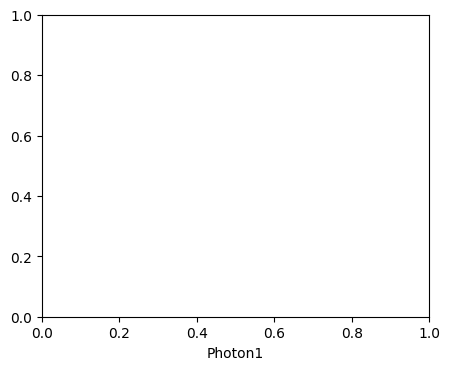

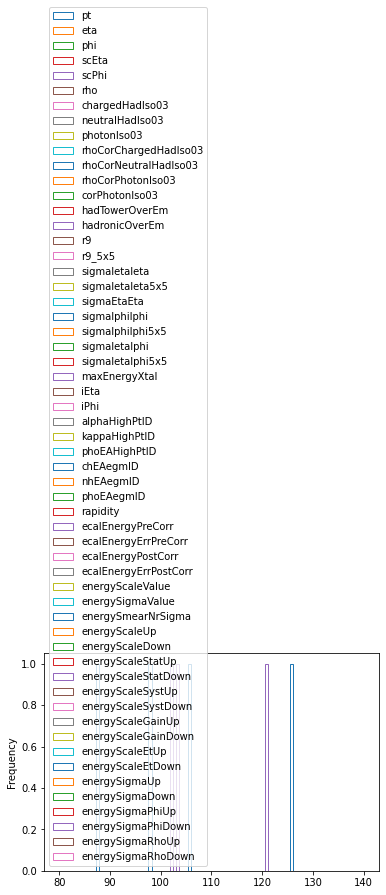

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(80, 140, 100)
df['bkg'][VARS[0]].plot.hist(bins=bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[0]].plot.hist(bins=bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(80,140)
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[1])
bins = np.linspace(0, 2000, 100)
df['bkg'][VARS[1]].plot.hist(bins=bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[1]].plot.hist(bins=bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,2000)

In [26]:
tree = uproot.open("/Users/bhimbam/Documents/root_exercise/ExoEfficiency.root:exoeff/fTree")
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | struct {int64_t run; ... | AsDtype("[('run', '>i8'), (...
GenPhoton1           | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
GenPhoton2           | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Photon1              | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Photon2              | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Vertex0              | struct {double vx; do... | AsDtype("[('vx', '>f8'), ('...
PrimaryVertex        | struct {double vx; do... | AsDtype("[('vx', '>f8'), ('...
nPV                  | int32_t                  | AsDtype('>i4')
BeamSpot             | struct {double x0; do... | AsDtype("[('x0', '>f8'), ('...


In [60]:
df1 = tree.arrays(filter_name='nPV',library ='pd')

In [61]:
df

,nPV
0,36
1,55
2,52
3,66
4,52
5,54
6,55
7,57
8,53
9,53


In [62]:
df2= tree.arrays(filter_name=['Event','GenPhoton1','GenPhoton2','Photon1','Photon2','Vertex0','PrimartVertex','BeamSpot'],library ='pd')

In [63]:
df2

Event                                                              \
    run LS evnum processid bx orbit       ptHat  alphaqcd  alphaqed   
0     1  1    11      5026 -1    -1  131.293686  0.122894  0.007850   
1     1  1    52      5026 -1    -1  452.969330  0.104769  0.007962   
2     1  1   369      5026 -1    -1  321.930969  0.109119  0.007931   
3     1  1   647      5026 -1    -1  313.782959  0.109460  0.007929   
4     1  1   718      5026 -1    -1   73.758049  0.134527  0.007799   
5     1  1   812      5026 -1    -1  361.116364  0.107616  0.007941   
6     1  1   830      5026 -1    -1   82.234489  0.132167  0.007808   
7     1  2  1325      5026 -1    -1  134.152435  0.122498  0.007852   
8     1  2  1710      5026 -1    -1  423.391663  0.105602  0.007956   
9     1  2  1994      5026 -1    -1  135.684769  0.122291  0.007853   

               ... Vertex0        BeamSpot                               \
       qscale  ... nTracks isFake       x0        y0        z0   sigmaZ   
0  131.293686  ...       0  False  0.01078  0.041893  0.024875  3.49885   
1  452.969330  ...       0  False  0.01078  0.041893  0.024875  3.49885   
2  321.930969  ...       0  False  0.01078  0.041893  0.024875  3.49885   
3  313.782959  ...       0  False  0.01078  0.041893  0.024875  3.49885   
4   73.758049  ...       0  False  0.01078  0.041893  0.024875  3.49885   
5  361.116364  ...       0  False  0.01078  0.041893  0.024875  3.49885   
6   82.234489  ...       0  False  0.01078  0.041893  0.024875  3.49885   
7  134.152435  ...       0  False  0.01078  0.041893  0.024875  3.49885   
8  423.391663  ...       0  False  0.01078  0.041893  0.024875  3.49885   
9  135.684769  ...       0  False  0.01078  0.041893  0.024875  3.49885   

                                              
    x0error   y0error   z0error sigmaZ0error  
0  0.000012  0.000012  0.013973      0.00988  
1  0.000012  0.000012  0.013973      0.00988  
2  0.000012  0.000012  0.013973      0.00988  
3  0.000012  0.000012  0.013973      0.00988  
4  0.000012  0.000012  0.013973      0.00988  
5  0.000012  0.000012  0.013973      0.00988  
6  0.000012  0.000012  0.013973      0.00988  
7  0.000012  0.000012  0.013973      0.00988  
8  0.000012  0.000012  0.013973      0.00988  
9  0.000012  0.000012  0.013973      0.00988  

[10 rows x 237 columns]

In [67]:
df=pd.concat([df2, df1], axis=1)
df

,"(Event, run)","(Event, LS)","(Event, evnum)","(Event, processid)","(Event, bx)","(Event, orbit)","(Event, ptHat)","(Event, alphaqcd)","(Event, alphaqed)","(Event, qscale)",...,"(Vertex0, isFake)","(BeamSpot, x0)","(BeamSpot, y0)","(BeamSpot, z0)","(BeamSpot, sigmaZ)","(BeamSpot, x0error)","(BeamSpot, y0error)","(BeamSpot, z0error)","(BeamSpot, sigmaZ0error)",nPV
0,1,1,11,5026,-1,-1,131.293686,0.122894,0.007850,131.293686,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,36
1,1,1,52,5026,-1,-1,452.969330,0.104769,0.007962,452.969330,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,55
2,1,1,369,5026,-1,-1,321.930969,0.109119,0.007931,321.930969,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,52
3,1,1,647,5026,-1,-1,313.782959,0.109460,0.007929,313.782959,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,66
4,1,1,718,5026,-1,-1,73.758049,0.134527,0.007799,73.758049,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,52
5,1,1,812,5026,-1,-1,361.116364,0.107616,0.007941,361.116364,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,54
6,1,1,830,5026,-1,-1,82.234489,0.132167,0.007808,82.234489,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,55
7,1,2,1325,5026,-1,-1,134.152435,0.122498,0.007852,134.152435,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,57
8,1,2,1710,5026,-1,-1,423.391663,0.105602,0.007956,423.391663,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,53
9,1,2,1994,5026,-1,-1,135.684769,0.122291,0.007853,135.684769,...,False,0.01078,0.041893,0.024875,3.49885,0.000012,0.000012,0.013973,0.00988,53


In [73]:
df[('nPV')], df[('Photon1','pt')]

(0    36
 1    55
 2    52
 3    66
 4    52
 5    54
 6    55
 7    57
 8    53
 9    53
 Name: nPV, dtype: int32,
 0    125.490379
 1    461.181000
 2    338.327087
 3    313.911682
 4     97.729622
 5    370.828278
 6     87.298897
 7    105.914192
 8    417.435150
 9    141.319321
 Name: (Photon1, pt), dtype: float64)

In [53]:
df = tree.arrays(library ='np')
df['Photon1']['pt']


array([125.49037933, 461.18099976, 338.3270874 , 313.91168213,
        97.72962189, 370.82827759,  87.29889679, 105.9141922 ,
       417.43515015, 141.31932068])